In [7]:
!pip install xgboost
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.3 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 931.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb


In [10]:
df1=pd.read_csv(r"C:\Users\Nandan G\python_practice\Titanic_test.csv")
df2=pd.read_csv(r"C:\Users\Nandan G\python_practice\Titanic_train.csv")

In [11]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#checking for missing values
df1.isnull().sum()
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

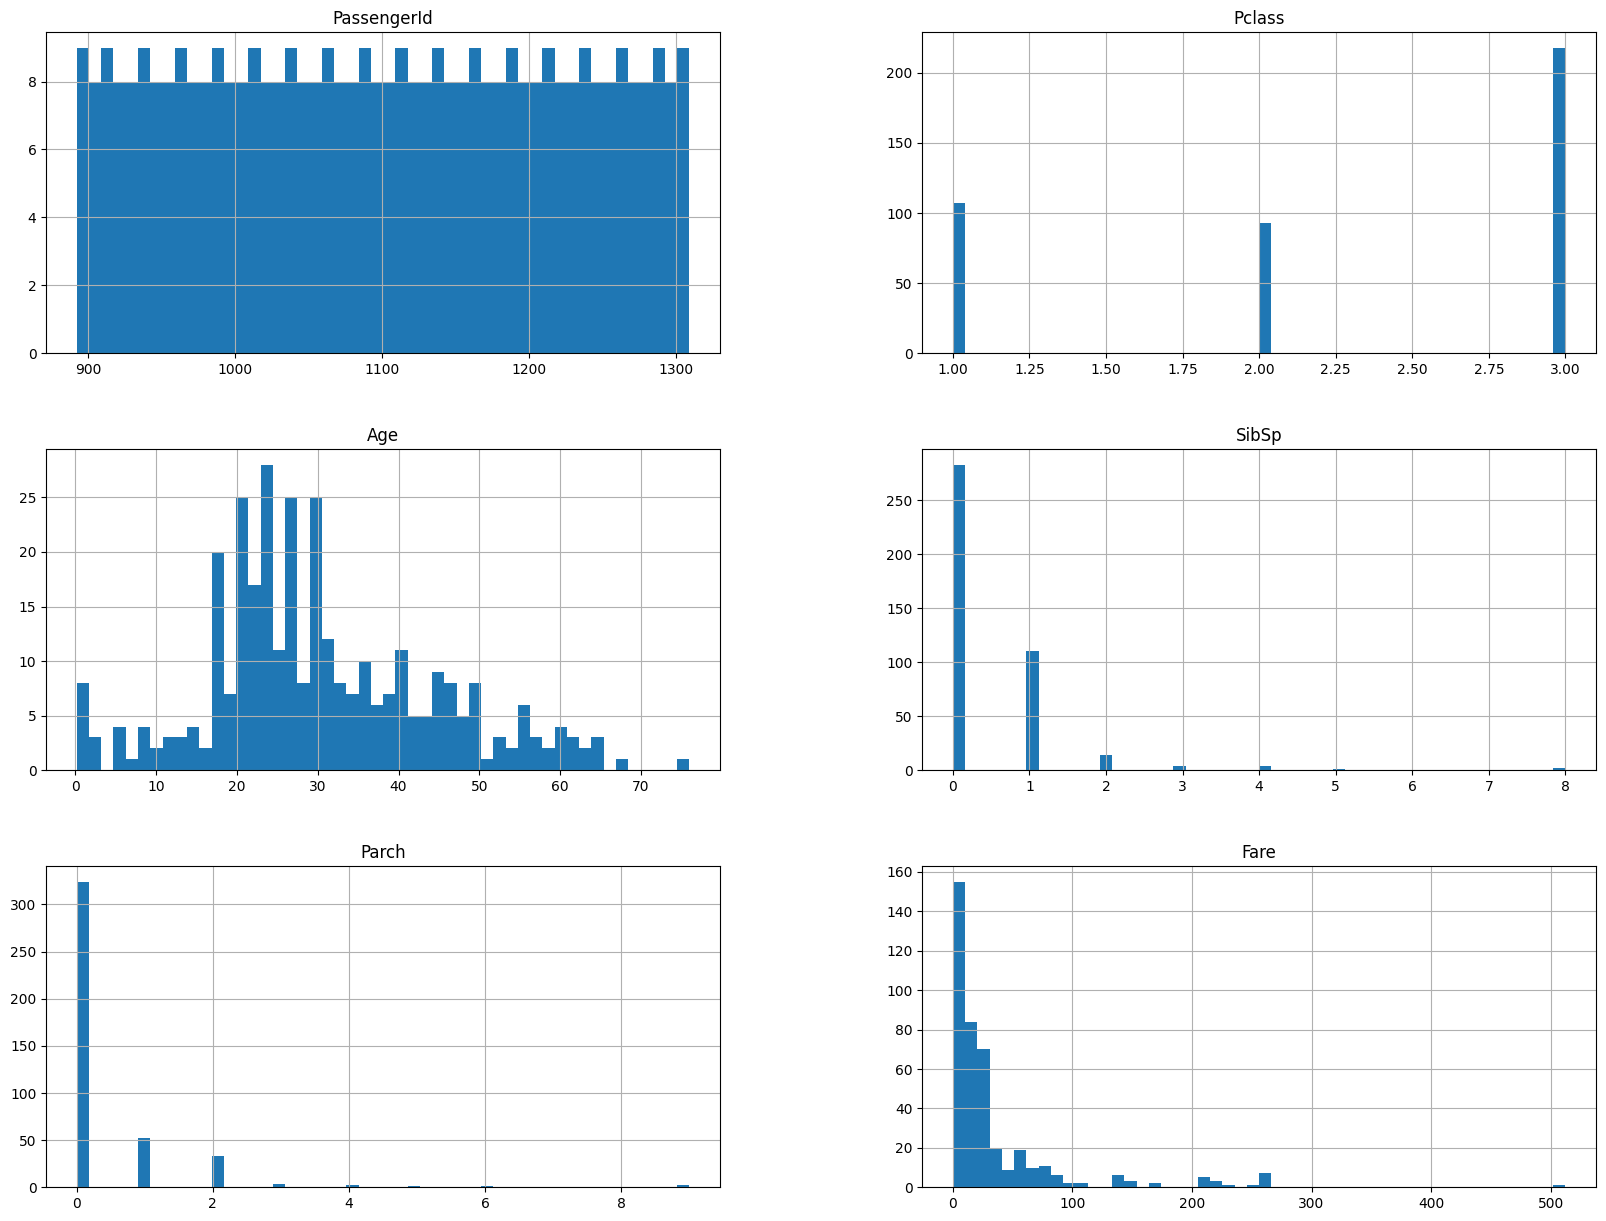

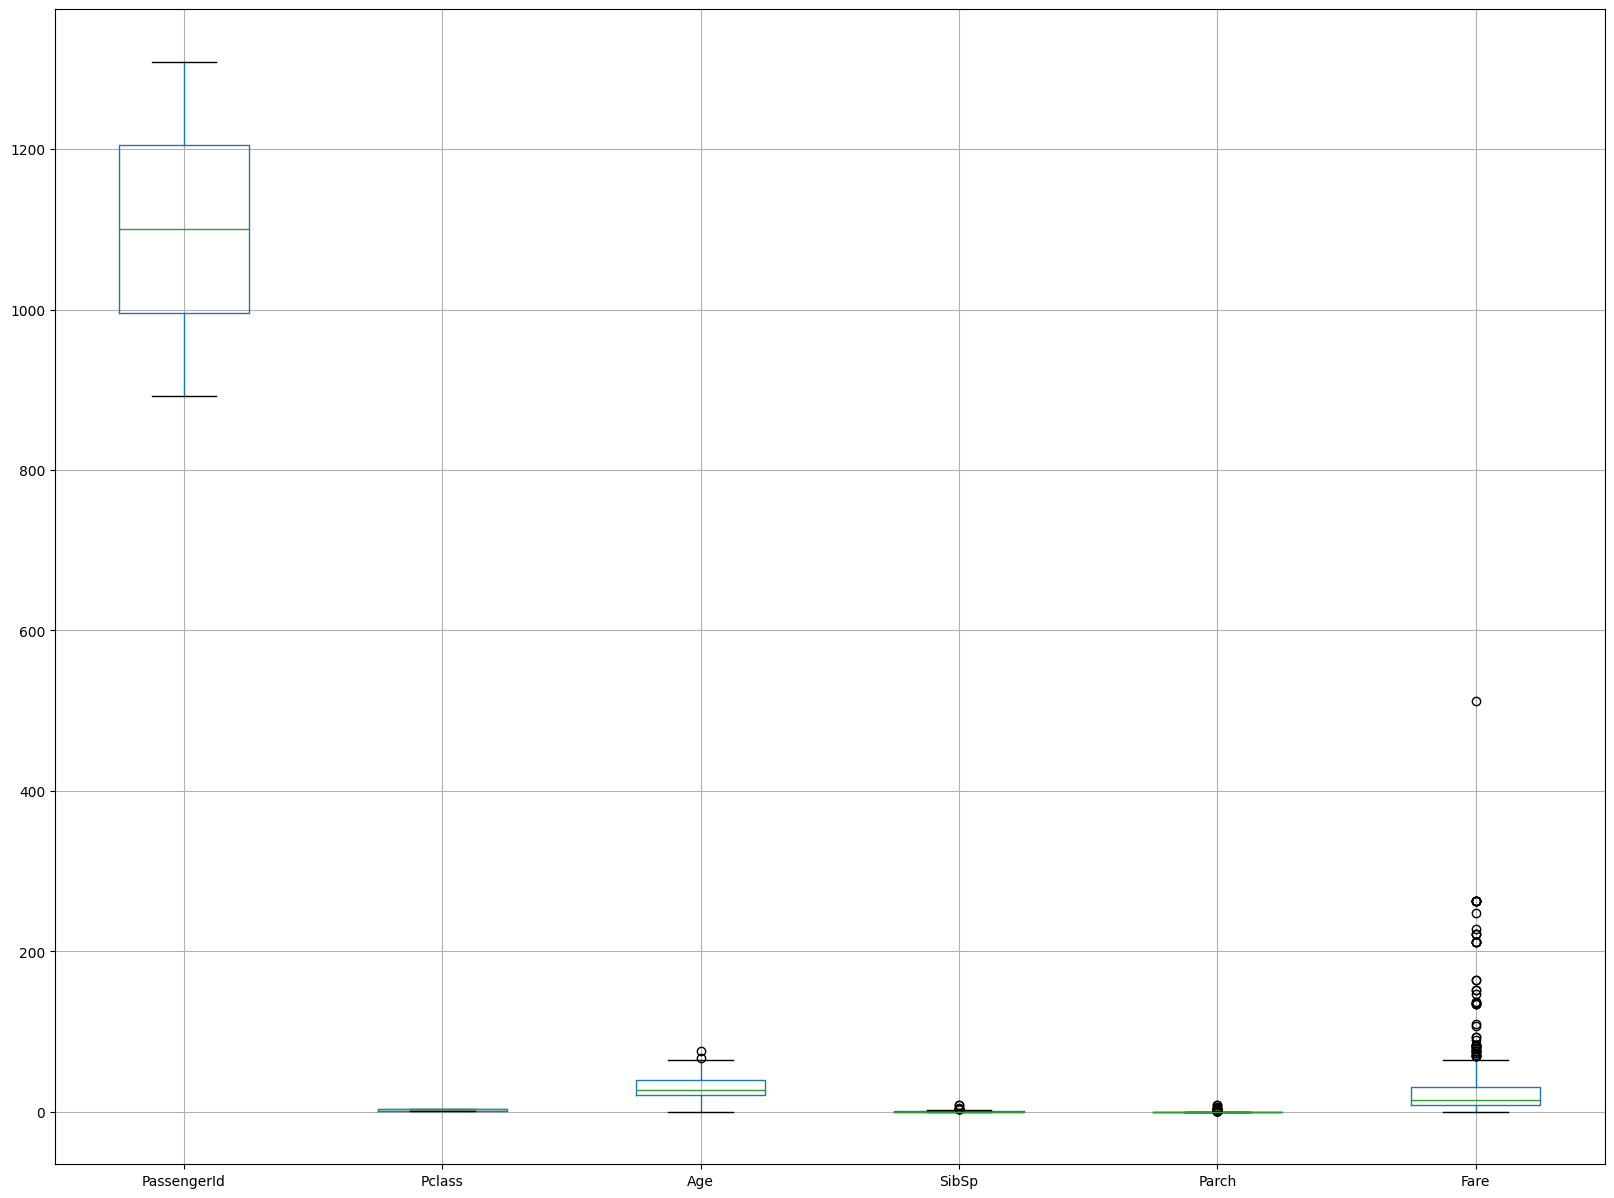

In [16]:
# 3. Data Exploration (Histograms, Box plots)
# For Dataset 1
df1.hist(bins=50, figsize=(20,15))
plt.show()

df1.boxplot(figsize=(20,15))
plt.show()

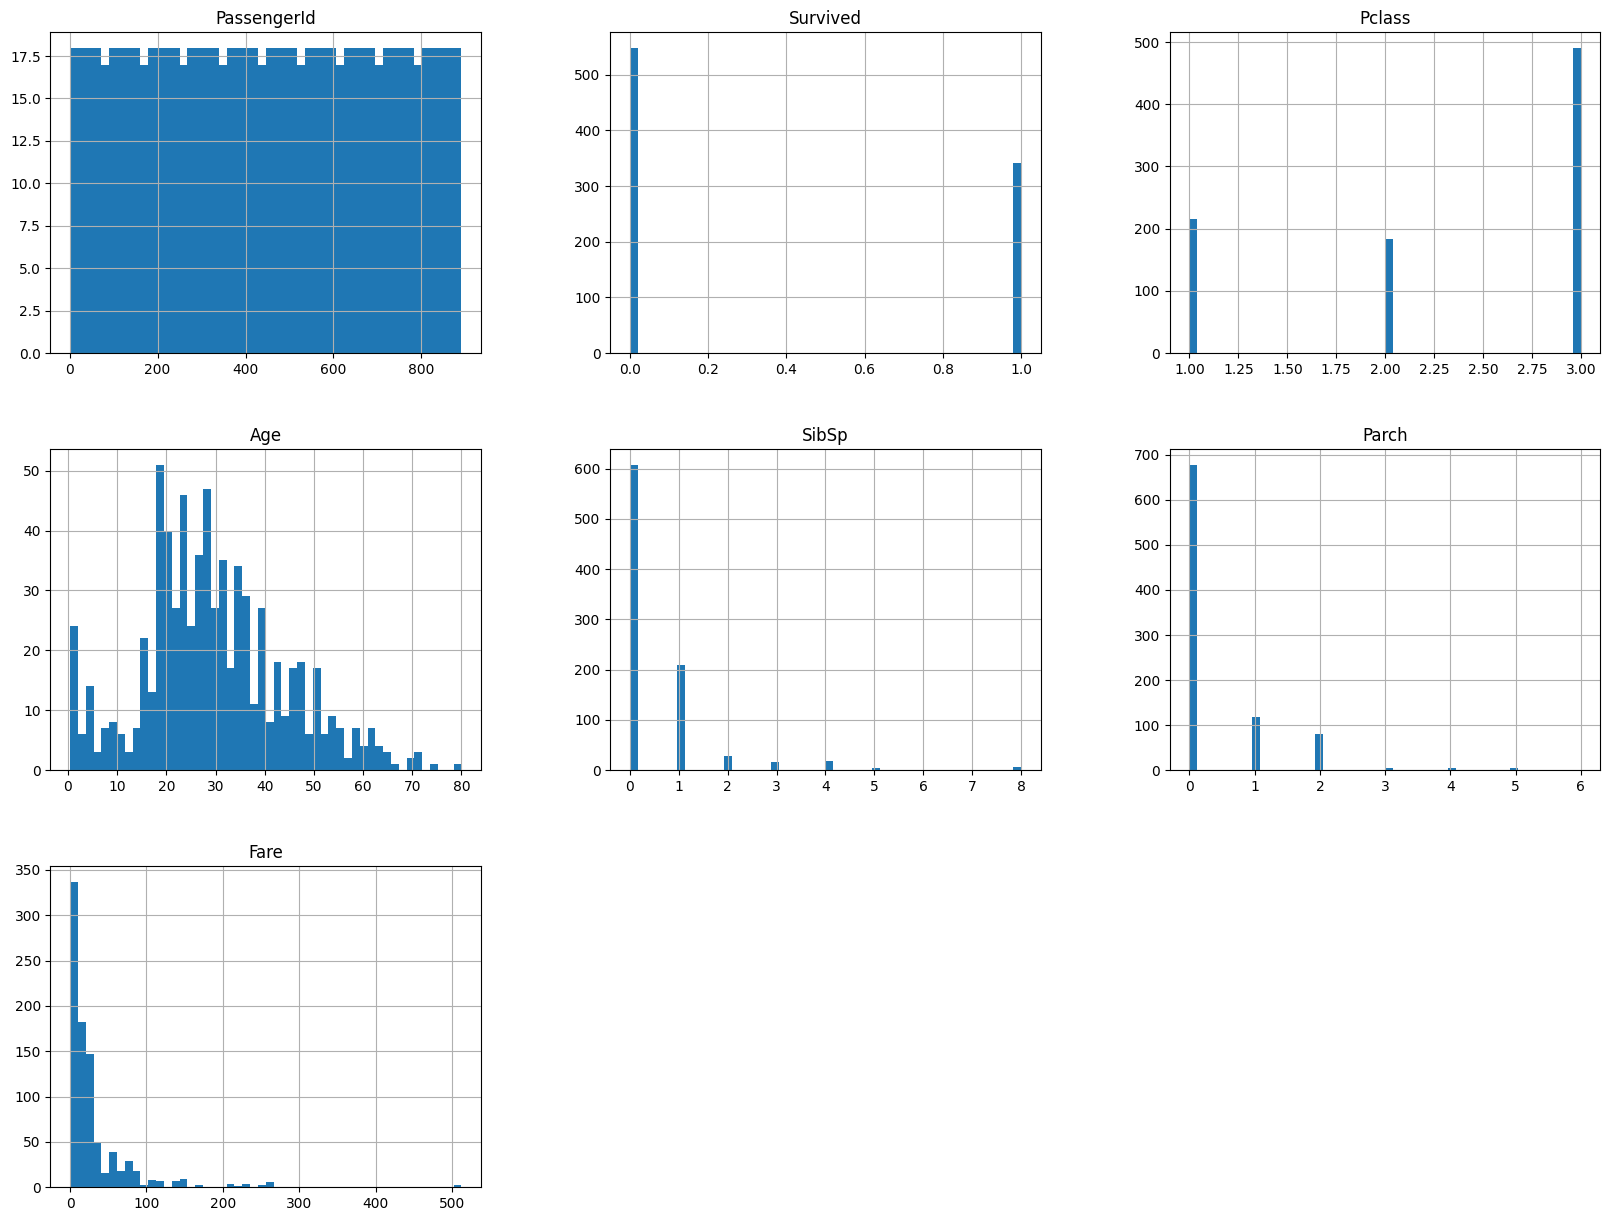

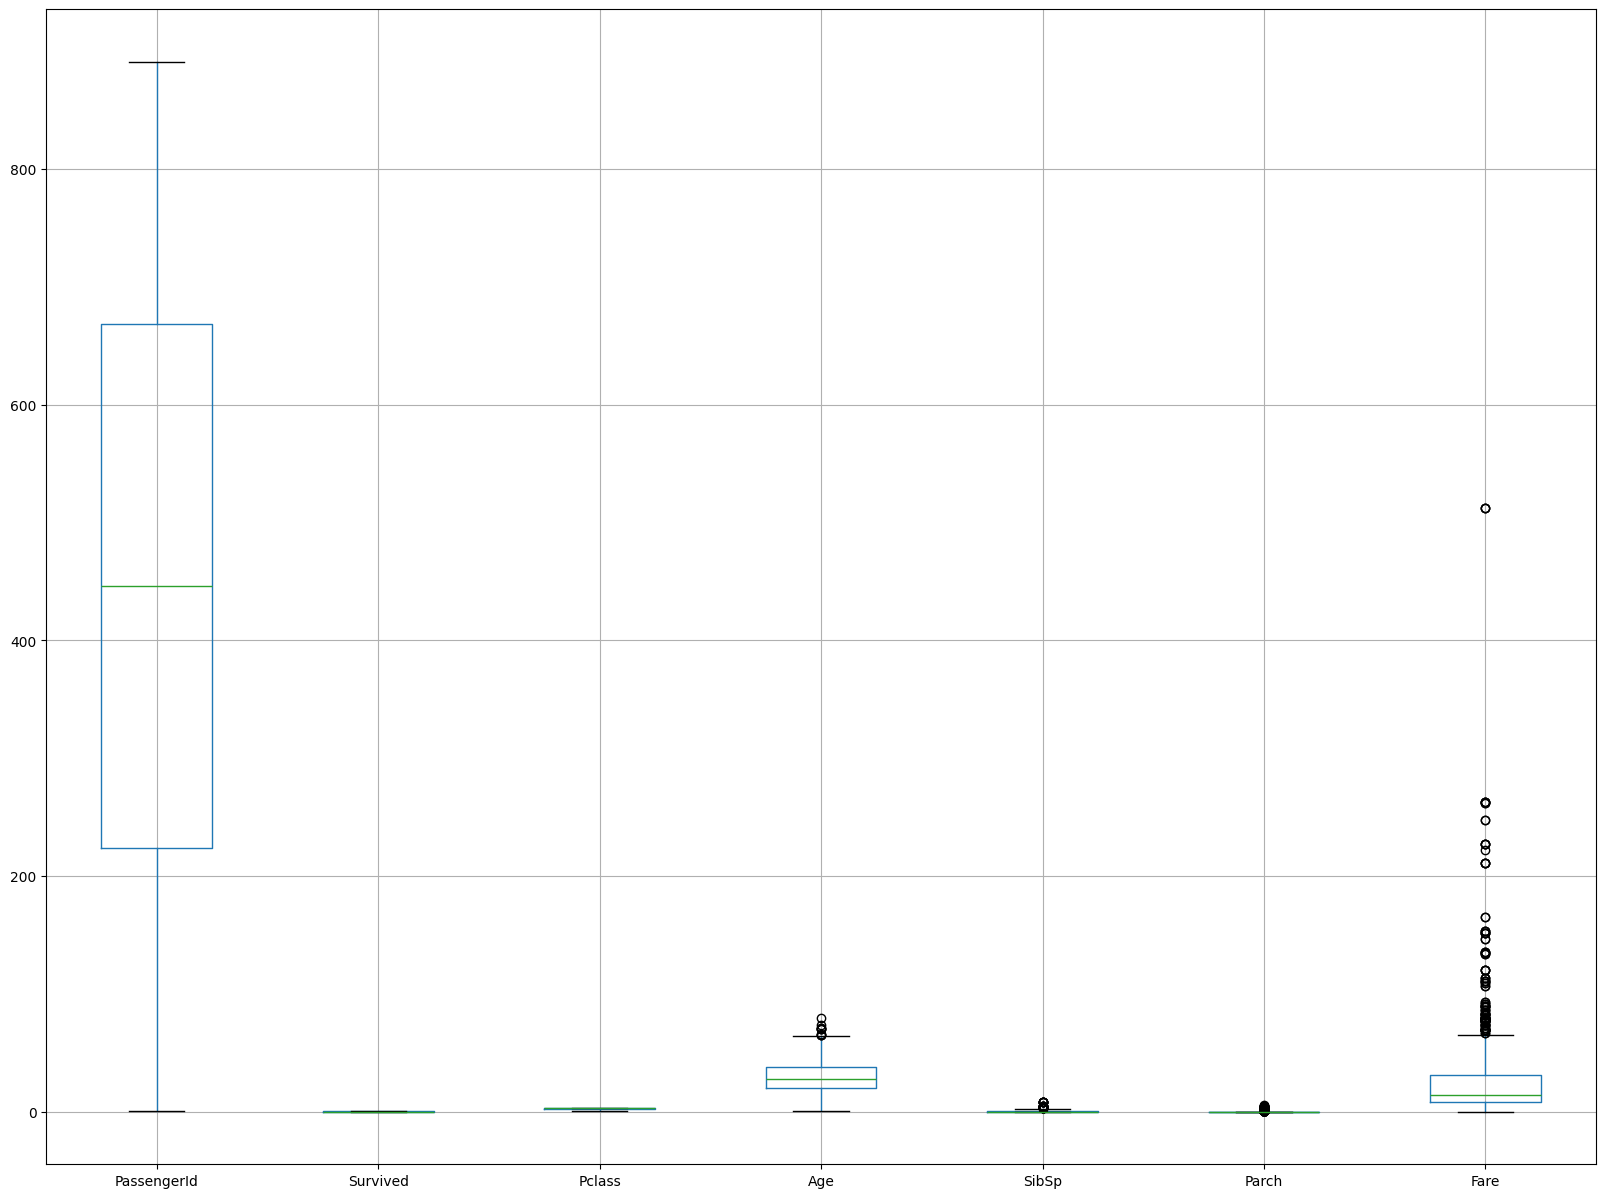

In [18]:
#dataset 2
df2.hist(bins=50, figsize=(20,15))
plt.show()

df2.boxplot(figsize=(20,15))
plt.show()

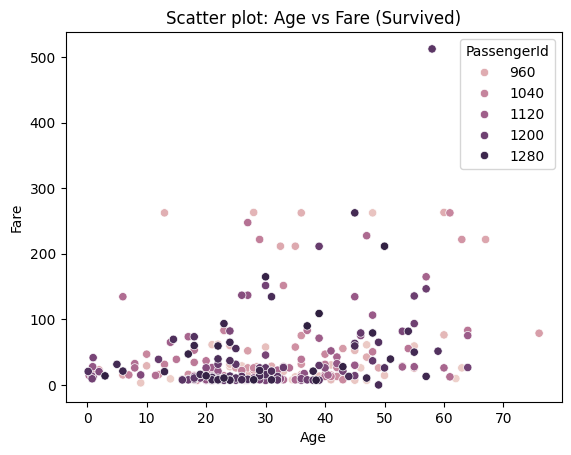

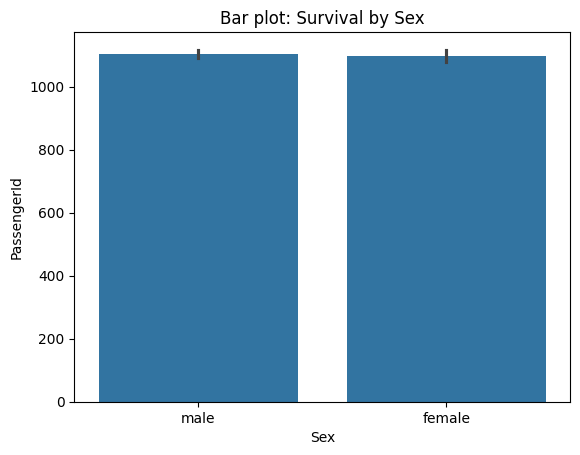

In [19]:
# 4. Data Relationships - Scatter and Bar Plots
sns.scatterplot(x='Age', y='Fare', hue='PassengerId', data=df1)
plt.title("Scatter plot: Age vs Fare (Survived)")
plt.show()

sns.barplot(x='Sex', y='PassengerId', data=df1)
plt.title("Bar plot: Survival by Sex")
plt.show()

In [21]:
# 5. Data Preprocessing
# Impute missing values for df1
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)
df1['Fare'].fillna(df1['Fare'].median(), inplace=True)
import warnings
warnings.filterwarnings('ignore')

C:\Users\Nandan G\AppData\Local\Temp\ipykernel_12776\3790274233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].median(), inplace=True)
C:\Users\Nandan G\AppData\Local\Temp\ipykernel_12776\3790274233.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [22]:
# Encode categorical variables in df1
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked'], drop_first=True)
# Drop columns not required for modeling (like 'PassengerId', 'Name', 'Ticket', 'Cabin' in Titanic dataset)
df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
# 6. Build Predictive Models
# Split dataset into training and testing sets
X = df1.drop('Fare', axis=1)
y = df1['Age'] # Changed 'passengersId' to 'Survived'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [25]:

# LightGBM Model
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 7
[LightGBM] [Info] Start training from score 29.444102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor()

In [26]:
# XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# 7. Evaluate Performance
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [28]:
# Evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # import metrics here to make the function self-contained

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")

# LightGBM performance
evaluate_model(y_test, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 1.9001335715851138
Mean Absolute Error: 0.5766402353885292
R-squared: 0.9850114808424076

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.04445927293457341
Mean Absolute Error: 0.06658812951473962
R-squared: 0.9996492990418792


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# LightGBM performance
evaluate_model(y_test, y_pred_lgb, "LightGBM")

# XGBoost performance
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Evaluation Metrics for LightGBM:
Mean Squared Error: 1.9001335715851138
Mean Absolute Error: 0.5766402353885292
R-squared: 0.9850114808424076

Evaluation Metrics for XGBoost:
Mean Squared Error: 0.04445927293457341
Mean Absolute Error: 0.06658812951473962
R-squared: 0.9996492990418792


In [30]:
# 8. Comparative Analysis (Cross-Validation and Hyperparameter Tuning can be added here)
# Cross-validation for LightGBM
lgb_cv = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print(f"\nLightGBM Cross-Validation Accuracy: {np.mean(lgb_cv)}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 7
[LightGBM] [Info] Start training from score 29.143713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [31]:
# Cross-validation for XGBoost
xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {np.mean(xgb_cv)}")

XGBoost Cross-Validation Accuracy: nan


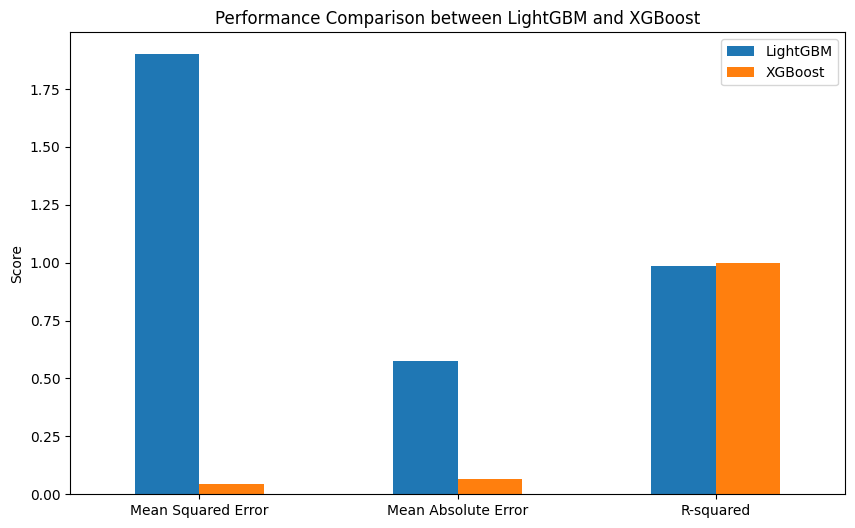

In [32]:
# Visualize the comparison
metrics = {
    'LightGBM': [mean_squared_error(y_test, y_pred_lgb), mean_absolute_error(y_test, y_pred_lgb), r2_score(y_test, y_pred_lgb)],
    'XGBoost': [mean_squared_error(y_test, y_pred_xgb), mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)]
}

metrics_df = pd.DataFrame(metrics, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Comparison between LightGBM and XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()